# 1. Import libraries & import libraries

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [136]:
df=pd.read_csv('F:/DS/craigslist-used car raw data/vehicles.csv')

# 2. Data cleaning
## 2.1 check the information

In [137]:
df.shape

(509577, 25)

In [138]:
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [139]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 25 columns):
id              509577 non-null int64
url             509577 non-null object
region          509577 non-null object
region_url      509577 non-null object
price           509577 non-null int64
year            508050 non-null float64
manufacturer    486813 non-null object
model           501588 non-null object
condition       277643 non-null object
cylinders       309894 non-null object
fuel            505592 non-null object
odometer        417253 non-null float64
title_status    506515 non-null object
transmission    505858 non-null object
vin             302152 non-null object
drive           365434 non-null object
size            167574 non-null object
type            368046 non-null object
paint_color     344871 non-null object
image_url       509563 non-null object
description     509561 non-null object
county          0 non-null float64
state           509577 non-null obj

## 2.2 Drop the unnecessary columns

In [140]:
#drop the useless column
drop_columns=['county','url','region_url','vin','image_url','fuel','cylinders','lat','long','state','description','size','type']
df=df.drop(columns=drop_columns)

## 2.3 Deal with missing data

In [141]:
#check the isnull number
df.isnull().sum()

id                   0
region               0
price                0
year              1527
manufacturer     22764
model             7989
condition       231934
odometer         92324
title_status      3062
transmission      3719
drive           144143
paint_color     164706
dtype: int64

In [142]:
#fillter the columns need to be filled by float and object
for n in df.drop(['manufacturer','model','paint_color'],axis=1).columns:
    if df[n].dtype=='float':
        df[n]=df[n].fillna(df[n].mean())
    if df[n].dtype=='object':
        df[n]=df[n].fillna(df[n].mode()[0])

In [143]:
#fill other columns
df['year']=df['year'].fillna(df['year'].mode()[0])
df['manufacturer']=df['manufacturer'].fillna('unkonwn')
df['model']=df['model'].fillna('unknown')
df['paint_color']=df['paint_color'].fillna('unknown')

In [144]:
#check the isnull number
df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
odometer        0
title_status    0
transmission    0
drive           0
paint_color     0
dtype: int64

## 2.4 Drop the fake data

In [145]:
#replace the 0 value by median
df['price']=df['price'].replace(0,df['price'].median())
df['odometer']=df['odometer'].replace(0,df['odometer'].median())

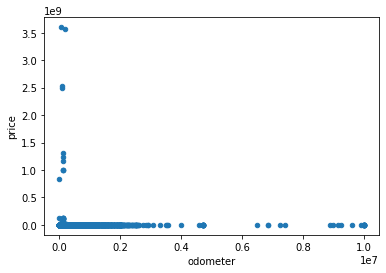

In [146]:
#check the fake max data
df.plot(kind='scatter',x='odometer',y='price')

In [147]:
df['price'].max()

3600028900

In [148]:
#set a gross range of samples
df1=df[df['price']<200000]
clean_data=df1[df1['odometer']<400000]

In [149]:
#replace the fake min data by median
clean_data['price']=clean_data['price'].replace(0,clean_data['price'].median())
clean_data['odometer']=clean_data['odometer'].replace(0,clean_data['odometer'].median())

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


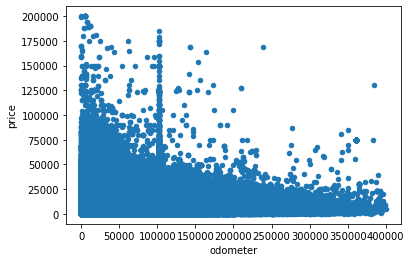

In [150]:
clean_data.plot(kind='scatter',x='odometer',y='price')

In [151]:
#devide the odometer into three classes
class_div=(clean_data['odometer'].max()-clean_data['odometer'].min())/3
class1=clean_data['odometer'].min()+class_div
class2=class1+class_div
class3=class2+class_div

In [152]:
print(class_div)
print(class1)
print(class2)
print(class3)
print(clean_data['odometer'].min)

133332.66666666666
133333.66666666666
266666.3333333333
399999.0
<bound method Series.min of 0          63500.0
1             10.0
2           7554.0
3             10.0
4          70150.0
            ...   
509572    103135.0
509573    108277.0
509574      6973.0
509575     37520.0
509576    152296.0
Name: odometer, Length: 508092, dtype: float64>


In [153]:
def odometer_class(n):
    if n<class1:
        return 'low odometer'
    if n>class1 and n<class2:
        return'medium odometer'
    else:
        return'high odometer'
clean_data['odometer_class']=clean_data['odometer'].apply(odometer_class)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [154]:
clean_data[['odometer_class','odometer','price']].head(10)

,odometer_class,odometer,price
0,low odometer,63500.0,17899
1,low odometer,10.0,9377
2,low odometer,7554.0,46463
3,low odometer,10.0,9377
4,low odometer,70150.0,49999
5,low odometer,120057.0,13999
6,low odometer,95484.0,34500
7,low odometer,89340.0,14500
8,medium odometer,226031.0,12500
9,low odometer,128153.0,34500


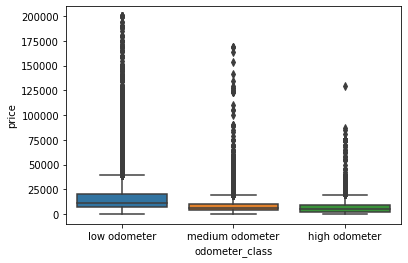

In [155]:
#detecting outlier by box chart
sns.boxplot(x='odometer_class', y='price', data=clean_data)

In [156]:
#get the iqr of price
from scipy.stats import iqr
iqr=iqr(clean_data['price'])
iqr

12218.5

In [157]:
price_stats=clean_data['price'].describe()
price_stats

count    508092.000000
mean      13260.830281
std       11173.090564
min           1.000000
25%        5731.500000
50%        9377.000000
75%       17950.000000
max      199997.000000
Name: price, dtype: float64

In [158]:
#get the upper and lower bound
Q3=price_stats['75%']
upper_bound=Q3+(iqr*1.5)
Q1=price_stats['25%']
lower_bound=Q1-(iqr*1.5)
print(upper_bound)
print(lower_bound)

36277.75
-12596.25


In [159]:
outlier_above=[n for n in clean_data['price'].values if n>upper_bound]

In [160]:
#delete outliers
clean_data=clean_data[~clean_data['price'].isin(outlier_above)]

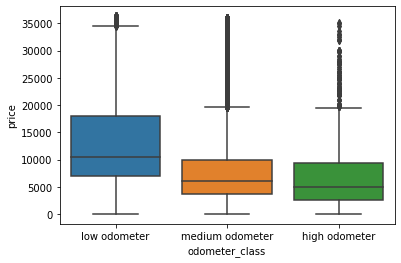

In [161]:
sns.boxplot(x='odometer_class', y='price', data=clean_data)

# 3.visualization

In [162]:
clean_data.head(10)

,id,region,price,year,manufacturer,model,condition,odometer,title_status,transmission,drive,paint_color,odometer_class
0,7034441763,salt lake city,17899,2012.0,volkswagen,golf r,excellent,63500.0,clean,manual,4wd,black,low odometer
1,7034440610,salt lake city,9377,2016.0,ford,f-150,excellent,10.0,clean,automatic,4wd,unknown,low odometer
3,7034440546,salt lake city,9377,2016.0,ford,f-150,excellent,10.0,clean,automatic,4wd,unknown,low odometer
5,7034406582,salt lake city,13999,2009.0,ram,unknown,excellent,120057.0,clean,automatic,4wd,silver,low odometer
6,7034405619,salt lake city,34500,2017.0,ford,f-350,excellent,95484.0,clean,automatic,4wd,white,low odometer
7,7034405349,salt lake city,14500,2007.0,gmc,sierra,excellent,89340.0,clean,automatic,4wd,unknown,low odometer
8,7034404595,salt lake city,12500,2013.0,ford,f-250,excellent,226031.0,clean,automatic,4wd,white,medium odometer
9,7034401857,salt lake city,34500,2012.0,ram,unknown,excellent,128153.0,clean,automatic,4wd,silver,low odometer
10,7034401494,salt lake city,5900,1994.0,ford,f-250,excellent,168838.0,clean,manual,4wd,white,medium odometer
11,7034400341,salt lake city,16500,2013.0,gmc,yukon,excellent,156385.0,clean,automatic,4wd,silver,medium odometer


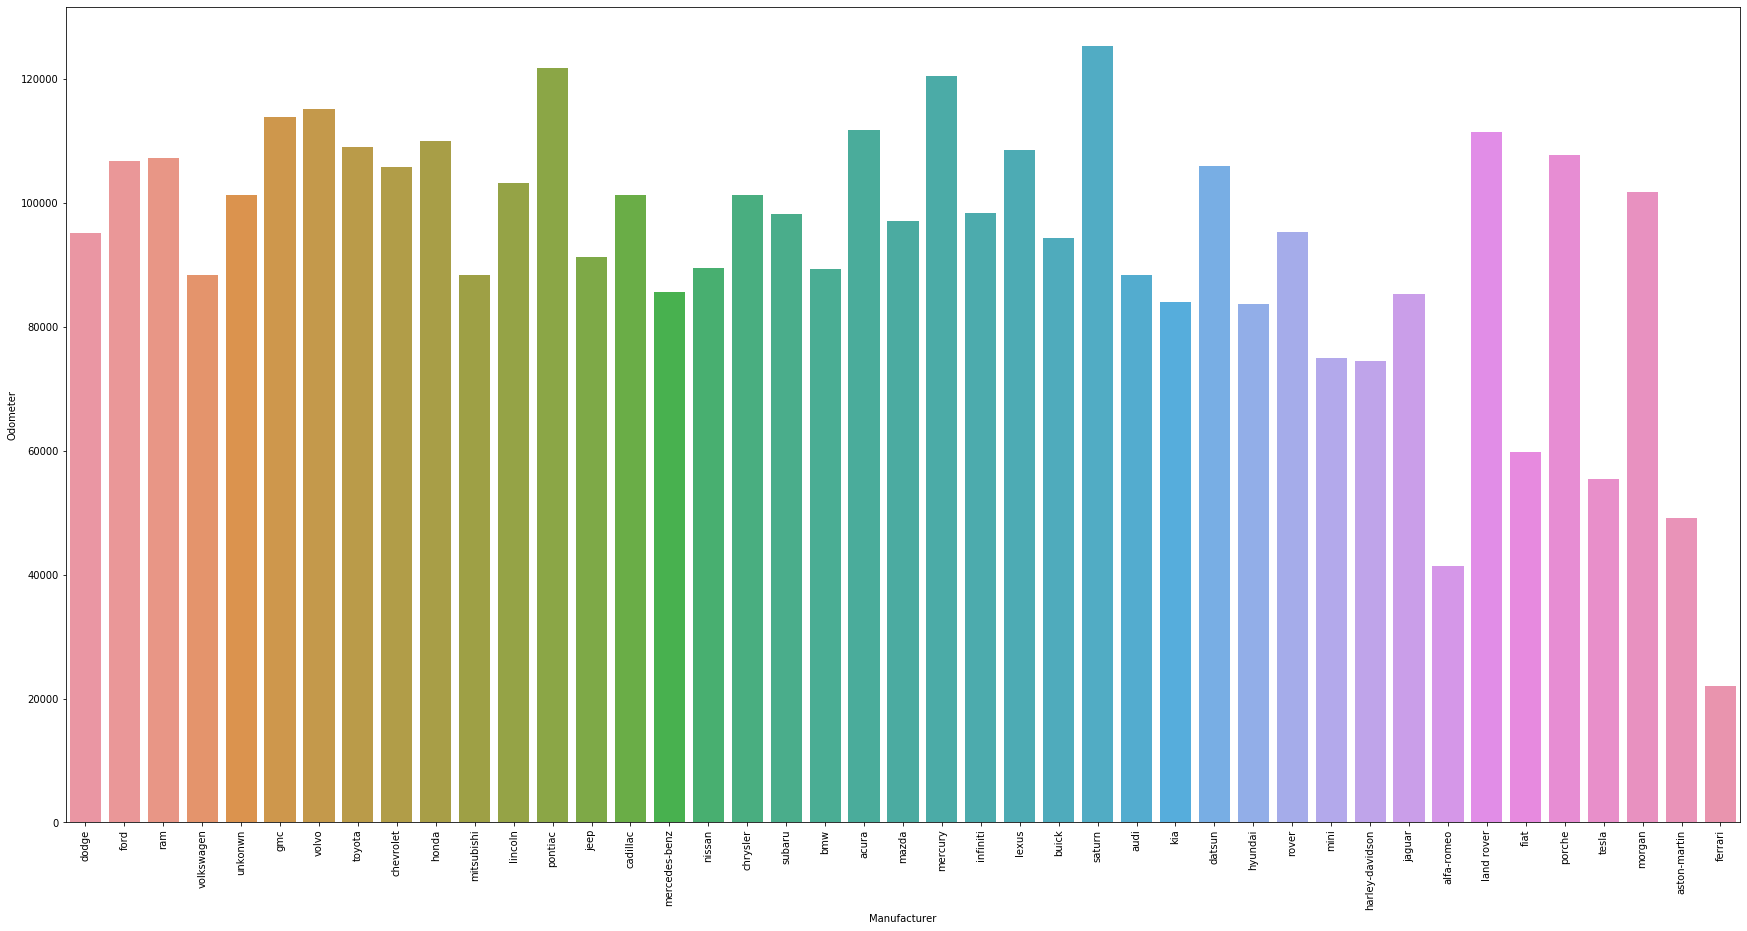

In [163]:
clean_data=clean_data.sort_values(by=['odometer'],ascending=False)
plt.figure(figsize=(30,15))
sns.barplot(x=clean_data.manufacturer, y=clean_data.odometer, ci=None)
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Odometer')
plt.show()

From the bar chart we could know that Volvos have the most miles when they are on second-hand sale.

In [164]:
saturn_data=clean_data.loc[clean_data['manufacturer']=='saturn']

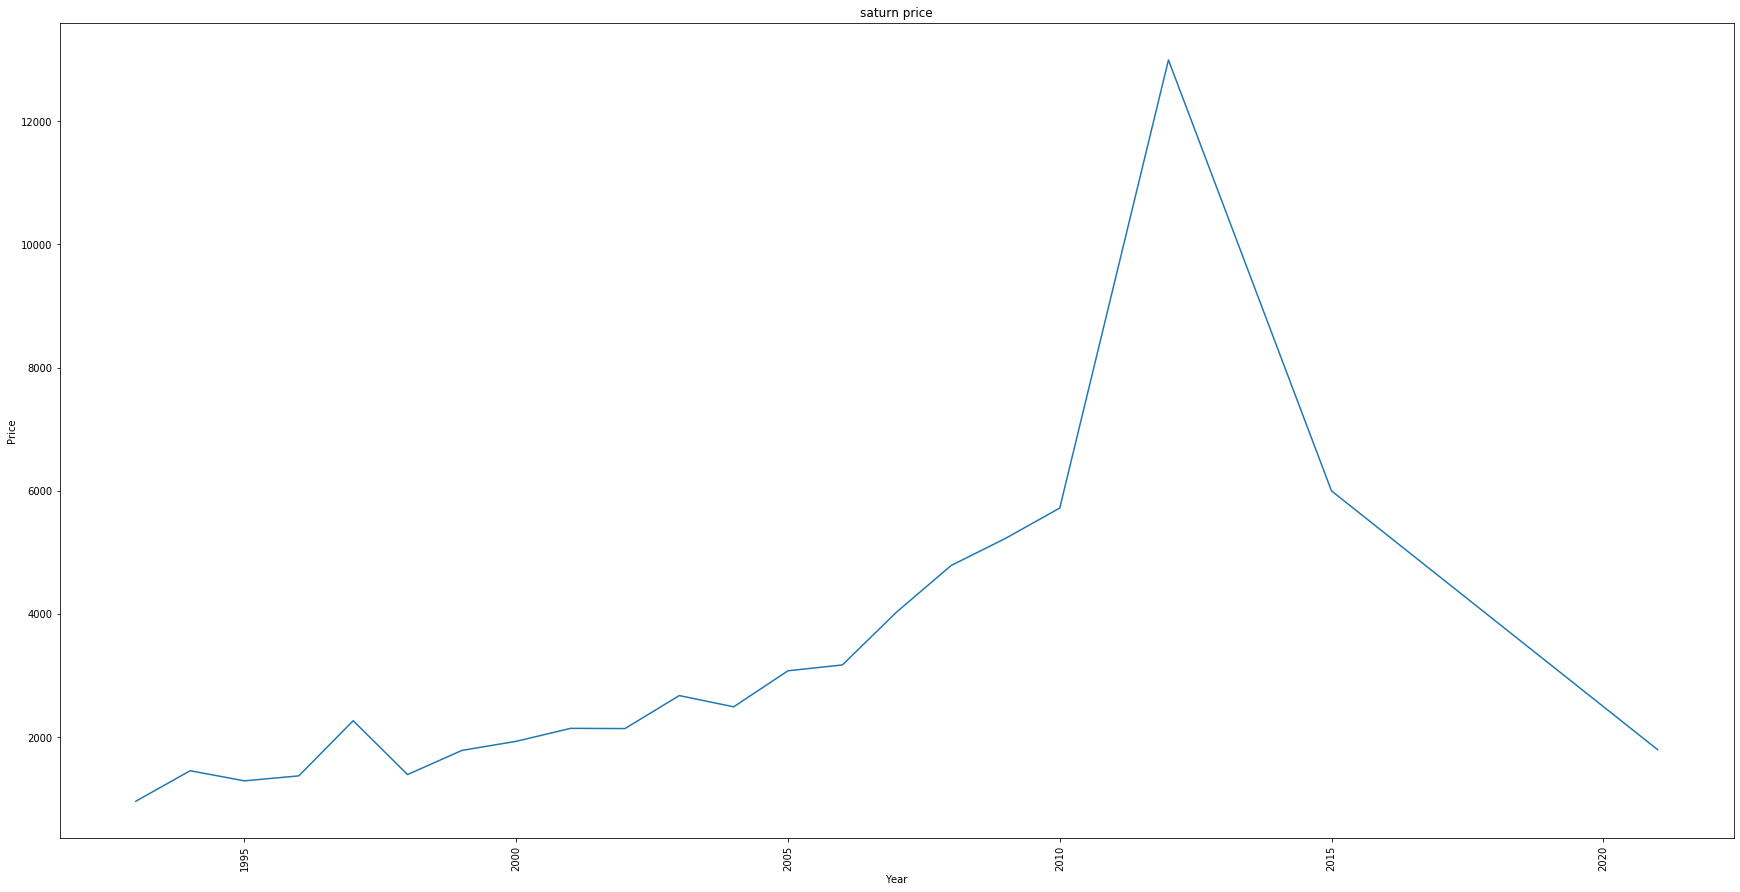

In [165]:
saturn_data=saturn_data.sort_values(by=['price'],ascending=False)
plt.figure(figsize=(30,15))
sns.lineplot(x=saturn_data.year, y=clean_data.price, ci=None)
plt.title('saturn price')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

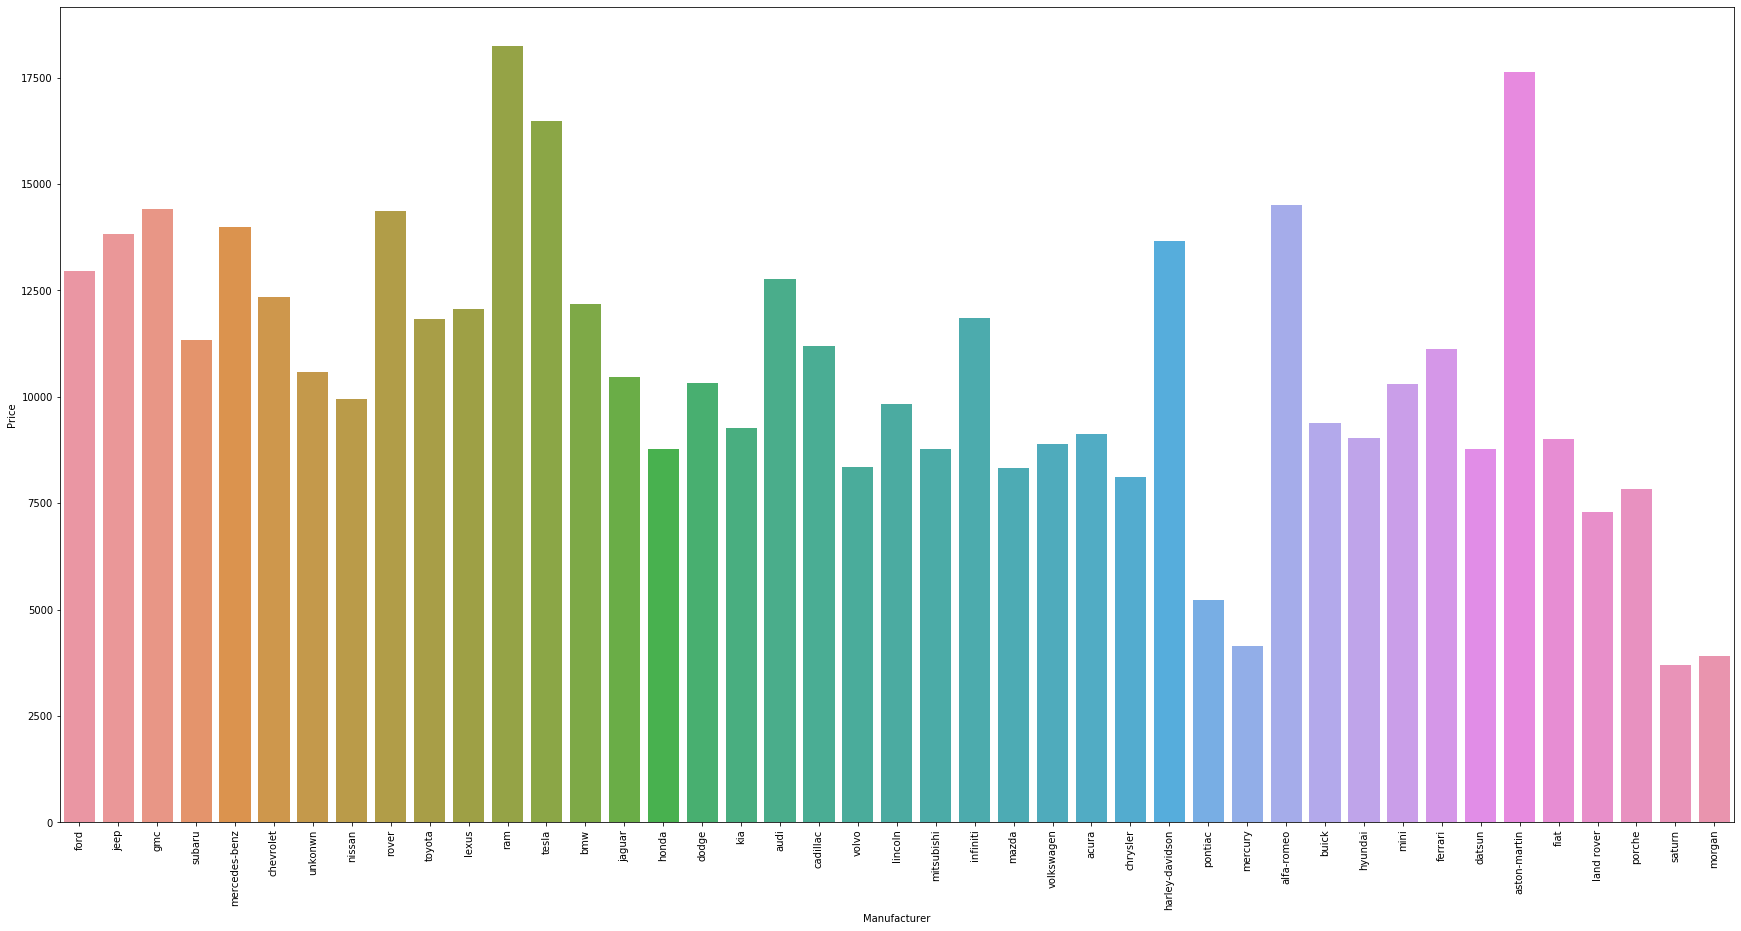

In [166]:
clean_data=clean_data.sort_values(by=['price'],ascending=False)
plt.figure(figsize=(30,15))
sns.barplot(x=clean_data.manufacturer, y=clean_data.price,ci=None)
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()

From the bar chart we could know that among used cars, ram usually has the highest price.

In [167]:
ram_data=clean_data.loc[clean_data['manufacturer']=='ram']

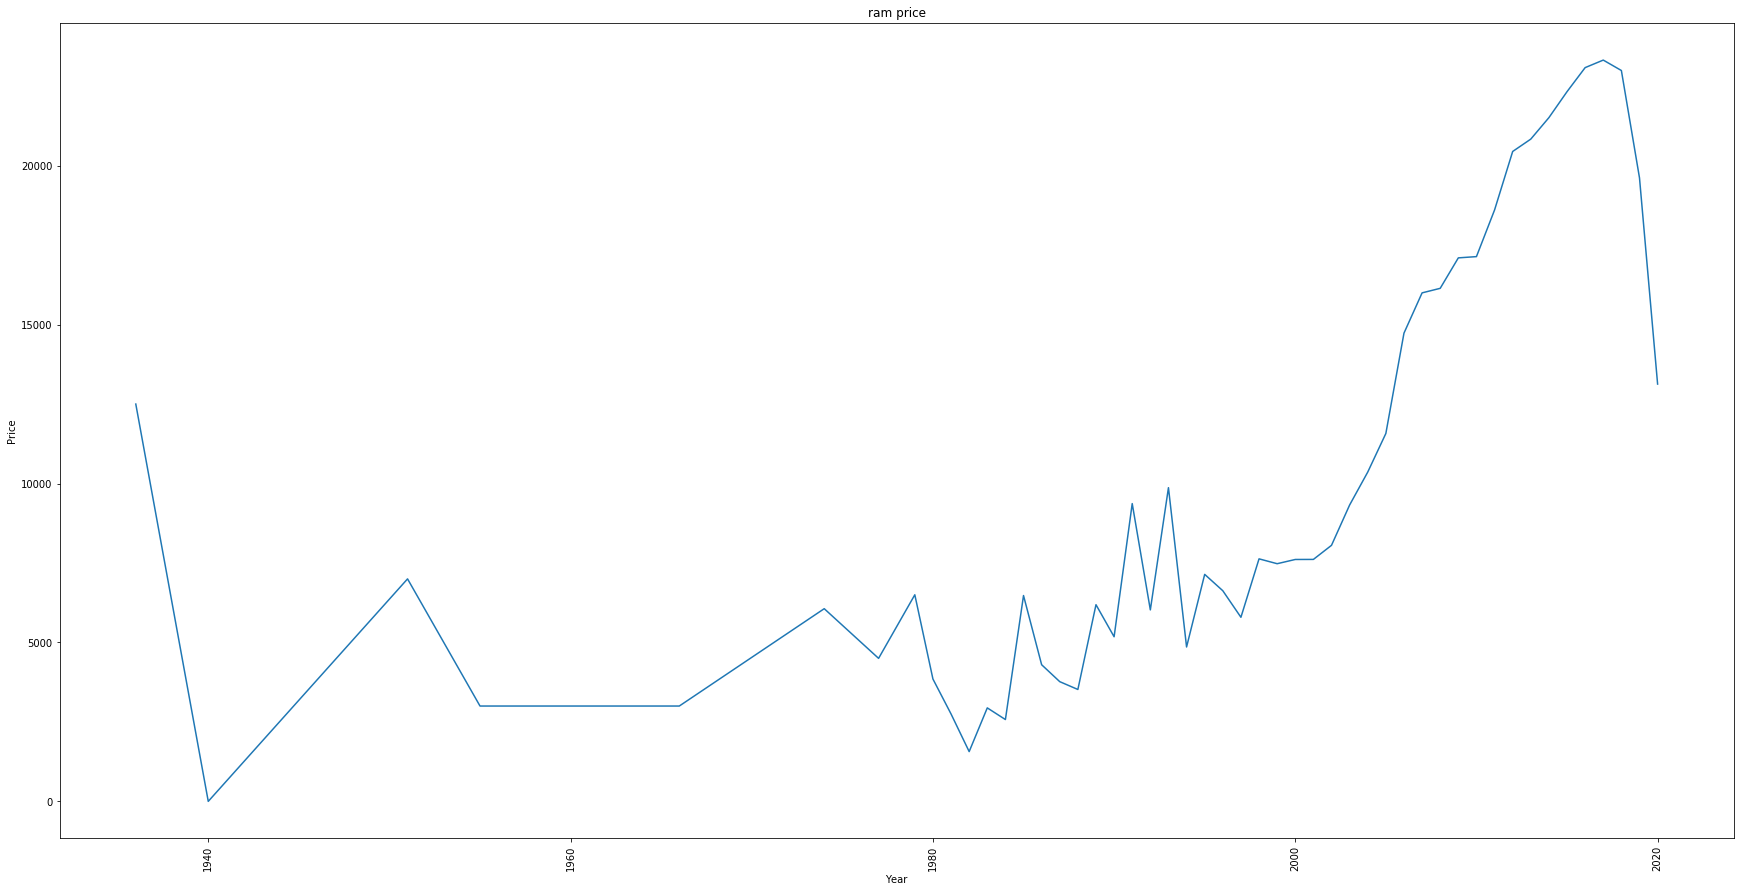

In [168]:
ram_data=ram_data.sort_values(by=['price'],ascending=False)
plt.figure(figsize=(30,15))
sns.lineplot(x=ram_data.year, y=ram_data.price, ci=None)
plt.title('ram price')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

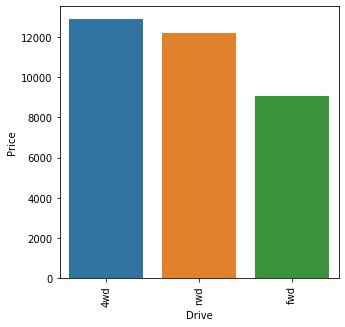

In [170]:
clean_data=clean_data.sort_values(by=['price'],ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(x=clean_data.drive, y=clean_data.price,ci=None)
plt.xticks(rotation= 90)
plt.xlabel('Drive')
plt.ylabel('Price')
plt.show()

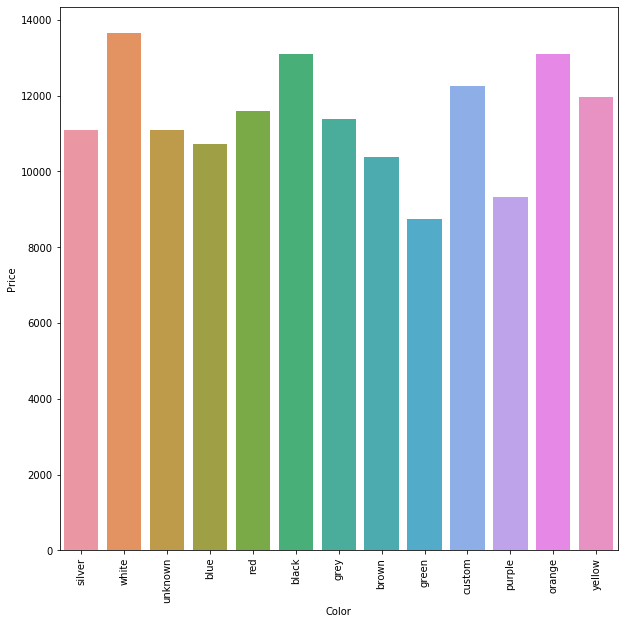

In [171]:
clean_data=clean_data.sort_values(by=['price'],ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=clean_data.paint_color, y=clean_data.price,ci=None)
plt.xticks(rotation= 90)
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

## 3.1 digital processing

In [ ]:
# Thanks to: https://www.kaggle.com/vbmokin/used-cars-price-prediction-by-15-models
#convert index into list
features=clean_data.columns.values.tolist()

In [ ]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
column_catagory=[]
for col in features:
    if clean_data[col].dtype in numeric:continue
    column_catagory.append(col)

In [ ]:
# Encoding categorical features
for col in column_catagory:
    if col in clean_data.columns:
        le = LabelEncoder()
        le.fit(list(clean_data[col].astype(str).values))
        clean_data[col] = le.transform(list(clean_data[col].astype(str).values))

In [ ]:
#convert tow columns type into int
clean_data['year'] = (clean_data['year']-1900).astype(int)
clean_data['odometer'] = clean_data['odometer'].astype(int)

In [ ]:
clean_data.head(10)

In [ ]:
clean_data.info()

In [ ]:
clean_data=clean_data[clean_data['price']>2000]
clean_data['odometer'] = clean_data['odometer'] // 5000
clean_data= clean_data[clean_data['year'] > 110]